In [1]:
import sys, os
if os.path.abspath(os.pardir) not in sys.path:
    sys.path.insert(0, os.path.abspath(os.pardir))
import CONFIG
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = CONFIG.CFG.DATA.BASE

In [4]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
sub_df = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))
# remove the duplicates from the train_df
train_df.drop_duplicates(keep=False, inplace=True, subset=['Patient', 'Weeks'])

In [35]:
# get the unique portion of the data for the patients
data = train_df.groupby(by="Patient")[['Patient', 'Age', 'Sex', 'SmokingStatus']].first().reset_index(drop=True)

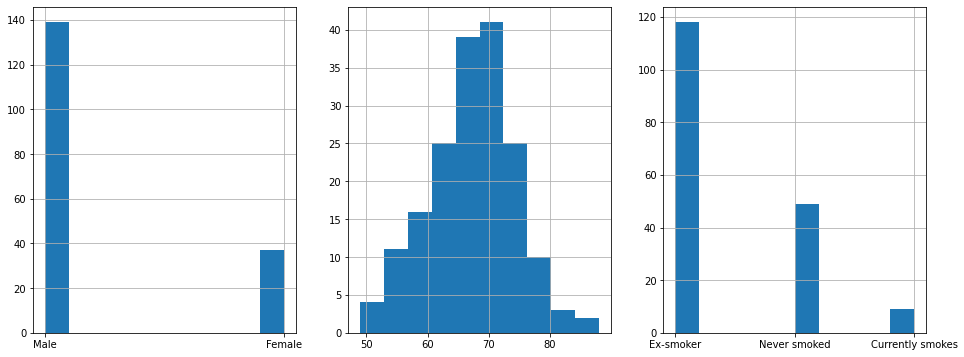

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))

data['Sex'].hist(ax=ax1)
data['Age'].hist(ax=ax2)
data['SmokingStatus'].hist(ax=ax3)

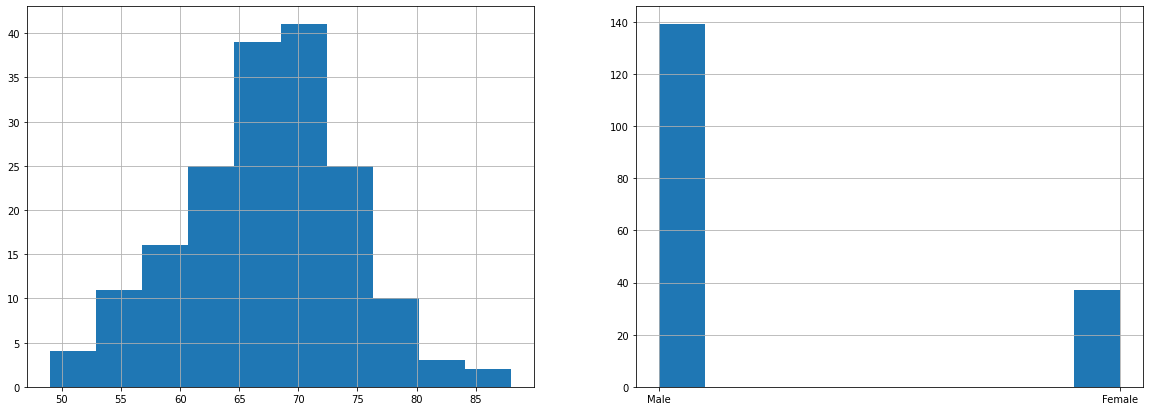

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
data['Age'].hist(ax=ax1)
data['Sex'].hist(ax=ax2)

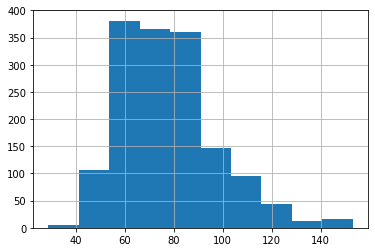

In [9]:
train_df["Percent"].hist()

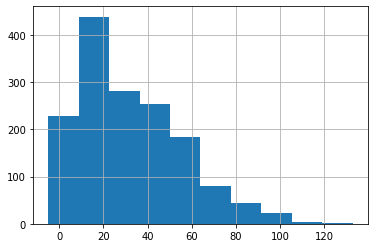

In [10]:
train_df['Weeks'].hist()

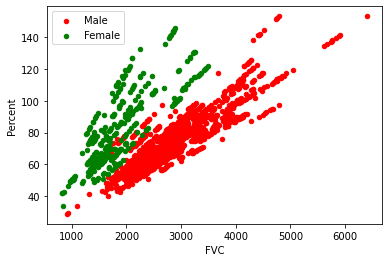

In [33]:
# FVC vs Percent plot
ax = train_df[train_df['Sex'] == "Male"].plot.scatter('FVC', 'Percent', c='red', label='Male')
train_df[train_df['Sex'] == "Female"].plot.scatter('FVC', 'Percent', c='green', ax=ax, label="Female")